In [1]:
# Import the necessary libraries

import re 

import numpy as np

import tweepy 

from tweepy import OAuthHandler 

from textblob import TextBlob 

import matplotlib.pyplot as plt

import pandas as pd

from wordcloud import WordCloud

from better_profanity import profanity

In [2]:


# Remember to keep your Keys and Tokens a secret!

consumer_key = 'MPTIX3xsAd0gLT75ZXk6AT4uK'
consumer_secret = '9SpOVFIam7Z5PUYcpA4XqzLg3RANDNc2atlOVQt11fj7YSuV1O' 
access_token = '450356051-SwHktO8BATWFgIrJEfOrDeWMdNqdBkXNdZ29xXFz'
access_token_secret = 'Qn4dMfoMMkbswtjdor9njAKQayuDsztDo3bJ5IdbarA0X'



In [3]:
# Access Twitter Data

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth)

In [4]:
# Input a query from the user

query = input("Please enter your topic / person of interest: ")

# In this case, we will input the query as 'Elon Musk'

# Filter the query to remove retweets

filtered = query + "-filter:retweets"

# Generate the latest tweets on the given query 

tweets = tweepy.Cursor(api.search, 
                           q=filtered,
                           lang="en").items(100)

# Create a list of the tweets, the users, and their location

list1 = [[tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]

Please enter your topic / person of interest: pemilu 2024


In [5]:


# Convert the list into a dataframe

df = pd.DataFrame(data=list1, 
                    columns=['tweets','user', "location"])



In [6]:
# Convert only the tweets into a list

tweet_list = df.tweets.to_list()

In [7]:
# Create a function to clean the tweets. Remove profanity, unnecessary characters, spaces, and stopwords.

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    r = tweet.lower()
    r = profanity.censor(r)
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [8]:
# Run the list of tweets through the function.

cleaned = [clean_tweet(tw) for tw in tweet_list]
cleaned

<ipython-input-7-92e0f7140c9e>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['eng ing eng',
 'share',
 'link',
 'apa ini artinya ahy not qualified if its true dont cry princes 2024 not you',
 'share',
 'meanwhile nationalists still wait see are starting make some positions clear pemilu 2024 bisa menjadi abu',
 'clear',
 'alternatif yang arief',
 'share',
 'ahaa cak imin top dech']

In [9]:
# Define the sentiment objects using TextBlob

sentiment_objects = [TextBlob(tweet) for tweet in cleaned]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0, TextBlob("eng ing eng"))

In [10]:
# Create a list of polarity values and tweet text

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

# Print the value of the 0th row.

sentiment_values[0]

[0.0, 'eng ing eng']

In [11]:


# Print all the sentiment values

sentiment_values[0:99]



[[0.0, 'eng ing eng'],
 [0.0, 'share'],
 [0.0, 'link'],
 [0.35,
  'apa ini artinya ahy not qualified if its true dont cry princes 2024 not you'],
 [0.0, 'share'],
 [0.05000000000000001,
  'meanwhile nationalists still wait see are starting make some positions clear pemilu 2024 bisa menjadi abu'],
 [0.10000000000000002, 'clear'],
 [0.0, 'alternatif yang arief'],
 [0.0, 'share'],
 [0.5, 'ahaa cak imin top dech']]

In [12]:
# Create a dataframe of each tweet against its polarity

sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df

,polarity,tweet
0,0.00,eng ing eng
1,0.00,share
2,0.00,link
3,0.35,apa ini artinya ahy not qualified if its true ...
4,0.00,share
5,0.05,meanwhile nationalists still wait see are star...
6,0.10,clear
7,0.00,alternatif yang arief
8,0.00,share
9,0.50,ahaa cak imin top dech


In [13]:
# Save the polarity column as 'n'.

n=sentiment_df["polarity"]

# Convert this column into a series, 'm'. 

m=pd.Series(n)

m

0    0.00
1    0.00
2    0.00
3    0.35
4    0.00
5    0.05
6    0.10
7    0.00
8    0.00
9    0.50
Name: polarity, dtype: float64

In [14]:
# Initialize variables, 'pos', 'neg', 'neu'.

pos=0
neg=0
neu=0

# Create a loop to classify the tweets as Positive, Negative, or Neutral.
# Count the number of each.

for items in m:
    if items>0:
        print("Positive")
        pos=pos+1
    elif items<0:
        print("Negative")
        neg=neg+1
    else:
        print("Neutral")
        neu=neu+1
        
print(pos,neg,neu)

Neutral
Neutral
Neutral
Positive
Neutral
Positive
Positive
Neutral
Neutral
Positive
4 0 6


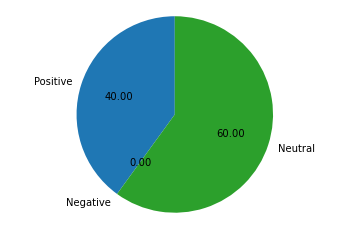

In [15]:


pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()



In [16]:
# Display the number of twitter users who feel a certain way about the given topic.

print("%f percent of twitter users feel positive about %s"%(pos,query))

print("%f percent of twitter users feel negative about %s"%(neg,query))

print("%f percent of twitter users feel neutral about %s"%(neu,query))

4.000000 percent of twitter users feel positive about pemilu 2024
0.000000 percent of twitter users feel negative about pemilu 2024
6.000000 percent of twitter users feel neutral about pemilu 2024


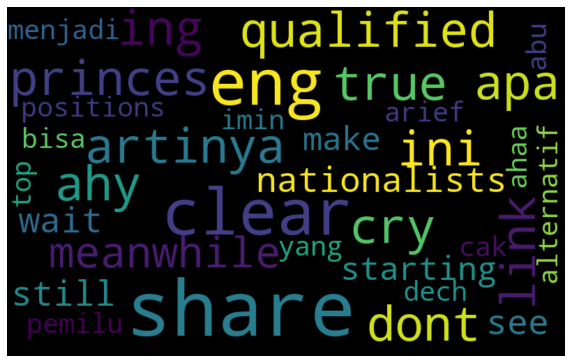

In [17]:
# Create a Wordcloud from the tweets

all_words = ' '.join([text for text in cleaned])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()